# Predicting Diabetics diseases



> Lamima Tabassum Ava



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
 
%matplotlib inline
tf.random.set_seed(42)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/diabetics/data.csv')

# Dataset Description

Dataset has 20 columns


---


Idno= Number of rows

Age = Users/ patient's Age

Agecat4 = Categories of Different Ages

Sex = The patient or user is male or female

BMI = User's Body mass Index


PA_level = User's Physical Activity level

DM_F = Dimethyl fumarate (DMF) is a potent activator of NRF2 used for the clinical treatment of multiple sclerosis (MS) since 2013 (Linker & Gold 2013, Bomprezzi 2015). 

SBP = Systolic blood pressure

DBP = Diastolic blood pressure

Waist = User's waist size (Higher waist size and higher BMI were each linked with higher diabetes risk).

WHR = User's Waist-Hip ratio

FBG = Fasting lood glucose  (The fasting plasma glucose (FPG) test, also known as the fasting blood glucose test (FBG) or fasting blood sugar test, measures the levels of glucose (sugar) in the blood.)

BG2H =Blood glucose for 2 hour glucose tolerance test.

HBA1C=  Haemoglobin A1c

Cholesterol= User's  cholestrol level


HDL = Dysfunctional high-density lipoprotein

LDL= Low density lipoprotein


Triglyceride = Triglycerides are fats in the blood


Insulin = level of insulin patient's blood








In [ ]:
df

,idno,Age,Agecat4,Sex,BMI,PA_level,DM_F,SBP,DBP,Waist,WHR,FBG,BG2h,HbA1c,Cholesterol,HDL,LDL,Triglyceride,Insulin,DM
0,1,35,1,2,23.733238,0,0,115.0,70.0,94.0,0.912621,5.2,4.6,4.2,4.3253,1.0360,2.6418,1.3673,6.91,0
1,1,35,1,1,30.780907,1,0,105.0,70.0,93.0,0.958763,5.6,5.8,5.2,4.3512,0.9065,2.8231,1.3560,10.02,0
2,2,32,1,1,31.195095,0,0,100.0,60.0,108.0,1.000000,5.2,5.8,5.4,4.5584,1.2173,2.6159,1.5933,10.07,0
3,3,39,1,1,26.709402,0,0,120.0,70.0,87.0,0.925532,5.6,5.3,5.8,6.0088,0.8288,3.1080,4.5087,7.56,0
4,3,55,3,2,30.666667,0,0,110.0,70.0,102.0,0.935780,4.6,5.3,5.1,3.9368,0.8029,2.5900,1.2430,5.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,4658,72,3,1,23.805402,1,0,110.0,70.0,81.0,0.920455,4.8,5.8,5.3,3.9368,0.9583,2.5900,0.8362,10.86,0
2289,4659,32,1,2,26.935720,0,0,105.0,70.0,80.0,0.769231,4.7,6.1,5.2,3.6519,1.2691,2.1238,0.5876,6.32,0
2290,4665,40,1,2,26.022644,0,0,90.0,60.0,82.0,0.820000,4.7,5.3,5.4,4.2217,0.8547,2.7972,1.2317,18.05,0
2291,4671,62,3,2,21.325134,0,0,105.0,70.0,71.0,0.876543,5.1,4.5,5.4,3.9368,0.9065,2.5900,0.9379,9.67,0


In [ ]:
features = df[['Age', 'Agecat4', 'Sex', 'BMI', 'PA_level', 'DM_F', 'SBP', 'DBP', 'Waist', 'WHR', 'FBG', 'BG2h', 'HbA1c', 'Cholesterol', 'HDL', 'LDL',	'Triglyceride',	'Insulin']]
print(features.dtypes)

Age               int64
Agecat4           int64
Sex               int64
BMI             float64
PA_level          int64
DM_F              int64
SBP             float64
DBP             float64
Waist           float64
WHR             float64
FBG             float64
BG2h            float64
HbA1c           float64
Cholesterol     float64
HDL             float64
LDL             float64
Triglyceride    float64
Insulin         float64
dtype: object


In [ ]:
from sklearn.utils import resample
 
df_majority = df[df.DM==0]
df_minorities = df[df.DM!=0]
 
df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])
df.DM.value_counts()

0    30000
1      181
Name: DM, dtype: int64

In [ ]:
df.describe()[1:].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
idno,1596.911136,1396.007064,1.000000,425.000000,1062.000000,2609.000000,4674.000000
Age,41.428283,13.815618,20.000000,30.000000,40.000000,50.000000,95.000000
Agecat4,1.394255,1.070846,0.000000,0.000000,1.000000,2.000000,3.000000
Sex,1.636096,0.481130,1.000000,1.000000,2.000000,2.000000,2.000000
BMI,22.474205,3.871123,12.738330,19.675167,22.206331,24.998904,38.736994
PA_level,0.147444,0.354554,0.000000,0.000000,0.000000,0.000000,1.000000
DM_F,0.172493,0.377814,0.000000,0.000000,0.000000,0.000000,1.000000
SBP,115.327275,16.022822,80.000000,105.000000,115.000000,120.000000,205.000000
DBP,76.592575,10.215783,50.000000,70.000000,77.500000,80.000000,125.000000
Waist,79.892002,10.371609,55.000000,72.000000,80.000000,88.000000,110.000000


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df['DM'].value_counts().index, values=df['DM'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Diabetes')
fig.show()

In [ ]:
df1 = df.copy()

for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

idno range: 13.0 to 4607.0
shape (29608, 20)
Age range: 20.0 to 80.0
shape (29413, 20)
Agecat4 range: 0.0 to 3.0
shape (29413, 20)
Sex range: 1.0 to 2.0
shape (29413, 20)
BMI range: 14.8720999405116 to 32.8888888888889
shape (28860, 20)
PA_level range: 0.0 to 1.0
shape (28860, 20)
DM_F range: 0.0 to 1.0
shape (28860, 20)
SBP range: 85.0 to 165.0
shape (28565, 20)
DBP range: 60.0 to 107.5
shape (28268, 20)
Waist range: 59.0 to 102.0
shape (28033, 20)
WHR range: 0.717948717948718 to 1.01010101010101
shape (27542, 20)
FBG range: 3.4 to 6.7
shape (27109, 20)
BG2h range: 3.6 to 10.2
shape (26794, 20)
HbA1c range: 4.1 to 6.7
shape (26409, 20)
Cholesterol range: 2.6936 to 6.6304
shape (25891, 20)
HDL range: 0.5439 to 1.4763
shape (25431, 20)
LDL range: 1.1914 to 4.553220000000075
shape (25236, 20)
Triglyceride range: 0.5763 to 5.4127
shape (24897, 20)


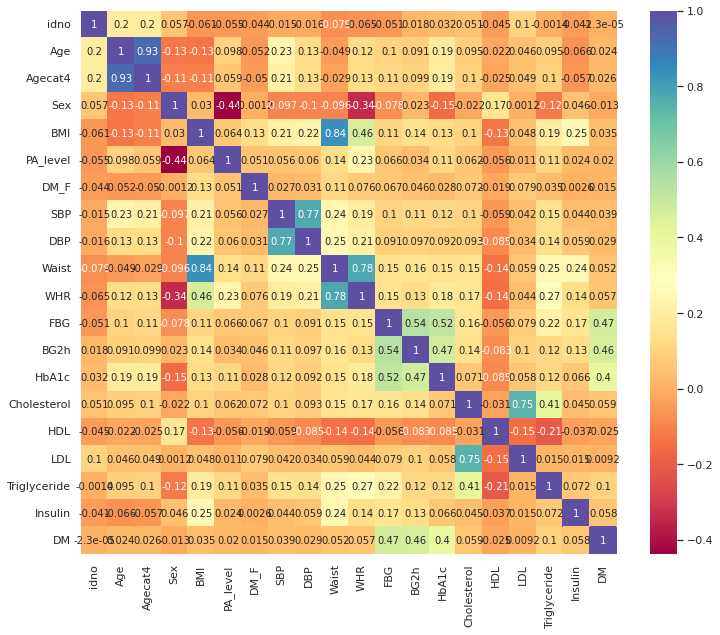

In [ ]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='Spectral')

In [ ]:
import plotly.express as px
fig = px.imshow(df.corr(),color_continuous_scale="Blues")
fig.update_layout(height=620)
fig.show()

In [ ]:
df_corr_bar = abs(df.corr()['DM']).sort_values()[:-1]
fig = px.bar(df_corr_bar, orientation='h', color_discrete_sequence =['#4585f4']*len(df_corr_bar))
fig.update_layout(showlegend=False)
fig.show()

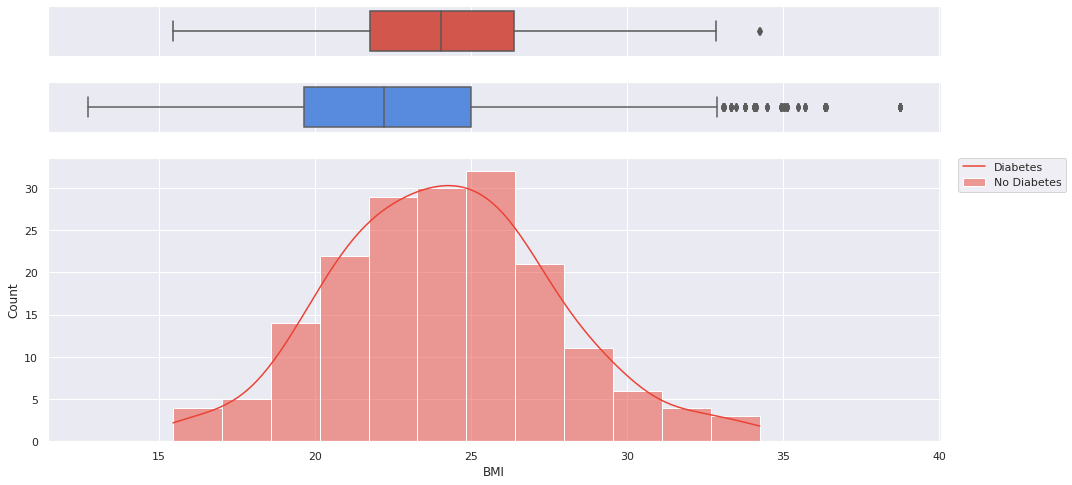

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['DM']==True]["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['DM']==True], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['DM']==False]["BMI"], ax=ax_box2, color='#4285f4')

 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Diabetes', 'No Diabetes'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

# Split the dataset

In [ ]:
from re import X
features = df
labels = df.DM
features=features.to_numpy('float')
labels=labels.to_numpy('int')

#type(features)
#print(type(x_train))
#print(type(x_val))
#print(x_val)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)
#labels


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# building Model

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=[20,1]))
model.add(layers.Conv1D(filters=32, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Conv1D(filters=64, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPool1D(2))
model.add(layers.LSTM(64))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 20, 32)            128       
                                                                 
 batch_normalization_8 (Batc  (None, 20, 32)           128       
 hNormalization)                                                 
                                                                 
 re_lu_8 (ReLU)              (None, 20, 32)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 20, 64)            6208      
                                                                 
 batch_normalization_9 (Batc  (None, 20, 64)           256       
 hNormalization)                                                 
                                                                 
 re_lu_9 (ReLU)              (None, 20, 64)           

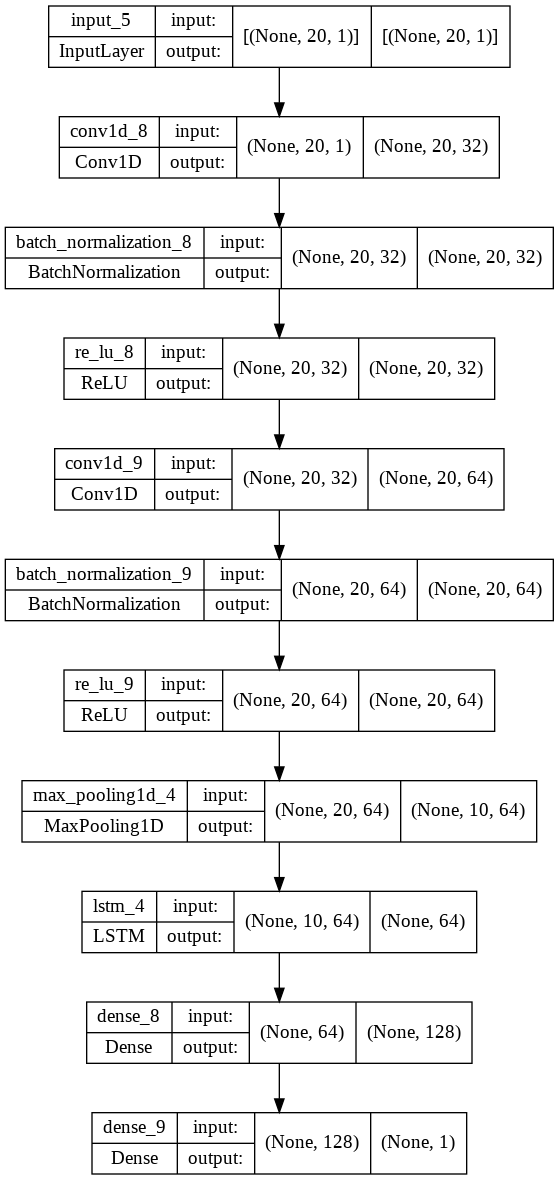

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:

callbacks = [keras.callbacks.ModelCheckpoint("mhealth_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
 
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["sparse_categorical_accuracy"],)
 
model_history = model.fit(x_train,y_train, epochs= 10, validation_data=(x_val,y_val), callbacks=callbacks)

Epoch 1/10
755/755 [==============================] - 14s 15ms/step - loss: 0.0443 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0346 - val_sparse_categorical_accuracy: 0.9944
Epoch 2/10
755/755 [==============================] - 10s 14ms/step - loss: 0.0329 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0116 - val_sparse_categorical_accuracy: 0.9944
Epoch 3/10
755/755 [==============================] - 11s 15ms/step - loss: 0.0117 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0050 - val_sparse_categorical_accuracy: 0.9944
Epoch 4/10
755/755 [==============================] - 11s 14ms/step - loss: 0.0094 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0185 - val_sparse_categorical_accuracy: 0.9944
Epoch 5/10
755/755 [==============================] - 11s 15ms/step - loss: 0.0091 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0042 - val_sparse_categorical_accuracy: 0.9944
Epoch 6/10
755/755 [==============================] - 11s 14ms/step - loss: 0.0077 - spars

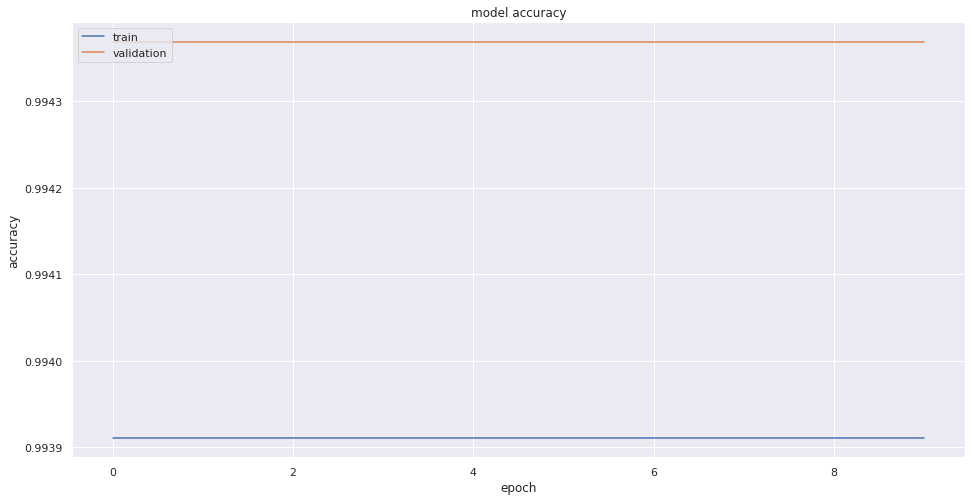

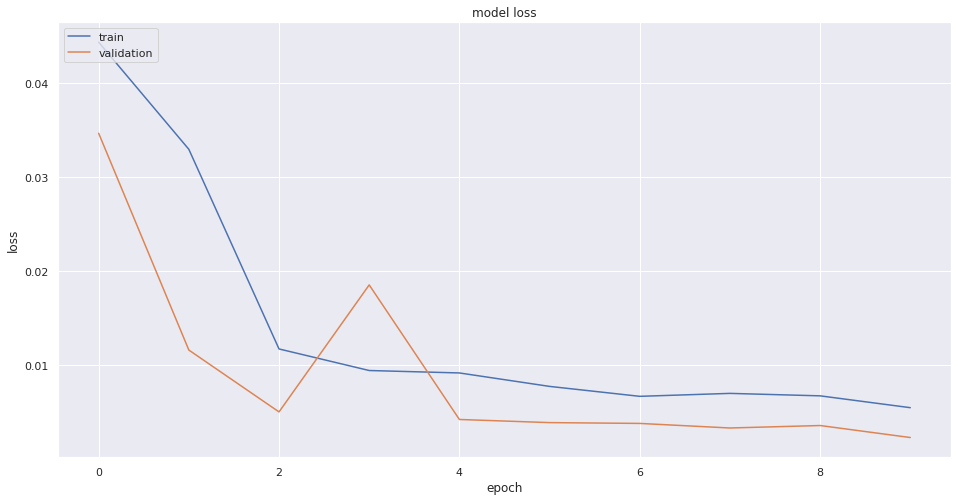

In [ ]:
plt.plot(model_history.history['sparse_categorical_accuracy'], label = 'train')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='validation')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc = 'upper left')
plt.show()

AUC: 0.5


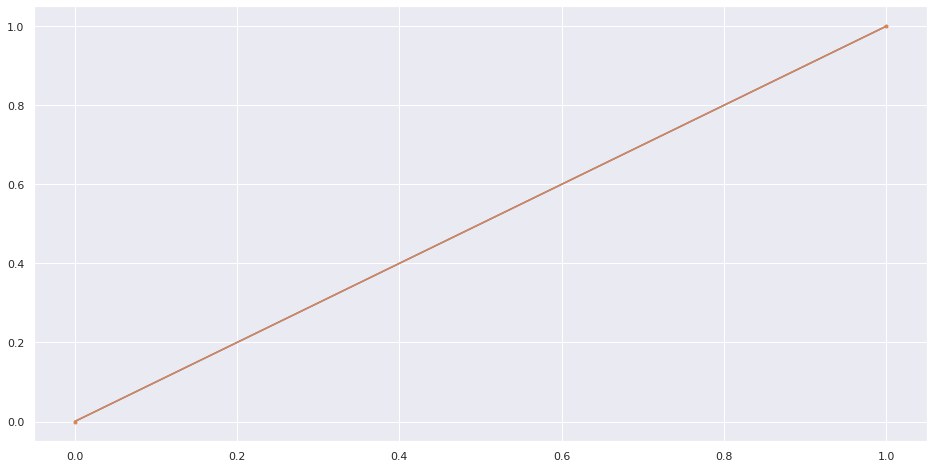

[[   0 6003]
 [   0   34]]
Accuracy: 0.005631936392247805
Precision: 0.005631936392247805
Recall: 1.0


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

y_pred=model.predict(x_val)
y_pred2=(y_pred2>.5).astype(float)

# todo: use boot-strap estimation
probs = model.predict(x_val)
probs = probs[:,0]
auc = roc_auc_score(y_val, probs)
print('AUC: %.1f' % auc)
fpr, tpr, thresholds = roc_curve(y_val, probs)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()
import sklearn.metrics as metrics

cmat = metrics.confusion_matrix(y_val, y_pred2)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_val, y_pred2))
print("Precision:",metrics.precision_score(y_val, y_pred2)) 
print("Recall:",metrics.recall_score(y_val, y_pred2))